In [23]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.cuda.is_available()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print("当前设备名称：", torch.cuda.get_device_name(device) if device.type == 'cuda' else 'CPU')

torch.Size([4, 48])
torch.Size([4, 48])


True

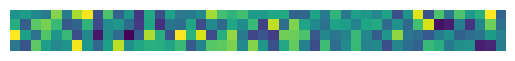

In [24]:
def image2emb_naive(image, patch_size, weight):
    patch = F.unfold(image,kernel_size=patch_size,stride=patch_size).transpose(-1, -2)
    # print(patch.shape)
    for i, tensor in enumerate(patch):
        print(tensor.shape)
        image = tensor.numpy()
        # 使用 matplotlib 保存图片
        plt.imshow(image)
        plt.axis('off')  # 不显示坐标轴
        plt.savefig(str(i)+'image.png', bbox_inches='tight', pad_inches=0)  # 保存图片到当前目录
    # print(weight.shape)
    patch_embedding = patch @ weight
    return patch_embedding
# 通过卷积实现
def image2emb_conv(image, kernel, stride):
    # kernel训练中更新参数 
    # oc*ic*kh*kw
    conv_output = F.conv2d(image, kernel, stride=stride)
    ba, oc, oh, ow = conv_output.shape
    patch_embedding = conv_output.reshape((ba, oc, oh*ow)).transpose(-1,-2)
    return patch_embedding
# test code for image2emb
bs, ic, image_h, image_w = 2, 3, 8, 8
patch_size = 4
model_dim = 8
patch_depth = patch_size*patch_size*ic
image = torch.randn(bs, ic, image_h, image_w)
weight = torch.randn(patch_depth, model_dim)
patch_embedding_naive = image2emb_naive(image, patch_size, weight)
# print(patch_embedding_naive.size())
# print(patch_embedding_naive)
##################################
kernel = weight.transpose(0, 1).reshape((model_dim, ic, patch_size, patch_size))
patch_embedding_conv = image2emb_conv(image, kernel, patch_size)
# print(patch_embedding_conv.size())
# print(patch_embedding_conv)
torch.allclose(patch_embedding_naive, patch_embedding_conv)

In [25]:
# step2 prepend CLS token embedding